In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

This miniproject's purpose is to practice cleaning the data using string functions. The dataset I will use is from two Kaggle's projects: 
- [World Development Indicators](https://www.kaggle.com/worldbank/world-development-indicators/version/2)
- [World Happiness](https://www.kaggle.com/unsdsn/world-happiness)

<br> Important column I will be using
- ShortName - Name of the country
- Region - The region the country belongs to
- IncomeGroup - The income group the country belongs to, based on Gross National Income (GNI) per capita
- CurrencyUnit - Name of country's currency
- SourceOfMostRecentIncomeAndExpenditureData - The name of the survey used to collect the income and expenditure data
- SpecialNotes - Contains any miscellaneous notes about the data

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Importing datasets

In [3]:
world_dev = pd.read_csv('World_dev.csv')
happiness2015 = pd.read_csv('World_Happiness_2015.csv')

#### Sample rows

In [4]:
world_dev[world_dev.ShortName == 'Iceland']

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
98,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


In [5]:
happiness2015[happiness2015.Country == 'Iceland']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201


In [6]:
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


In [7]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [8]:
merged = merged.rename(col_renaming, axis=1)

Pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods. Vectorized string methods can be chained. Below I am checking some possibilities(because splitting currency is not for analyse purpose and not for subsequent calculations)

In [9]:
merged['CurrencyUnit'].str[0:5].head()

0    Swiss
1    Icela
2    Danis
3    Norwe
4    Canad
Name: CurrencyUnit, dtype: object

#### Splitting the string

In [10]:
merged['CurrencyUnit'].str.upper().str.split().head()

0        [SWISS, FRANC]
1      [ICELAND, KRONA]
2       [DANISH, KRONE]
3    [NORWEGIAN, KRONE]
4    [CANADIAN, DOLLAR]
Name: CurrencyUnit, dtype: object

In [11]:
merged['Currency Vectorized'] = merged.CurrencyUnit.str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [12]:
merged['CurrencyUnit'].isnull().sum()

13

In [13]:
merged['CurrencyUnit'].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

#### Apply fuction 

In [14]:
def compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)
lengths_apply.head()

0    11
1    13
2    12
3    15
4    15
Name: CurrencyUnit, dtype: int64

In [15]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

In [16]:
lengths = merged.CurrencyUnit.str.len()
value_counts = lengths.value_counts(dropna=False)
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

#### Finding pattern in strings

In [17]:
pattern = r"[Nn]ational accounts"
national_accounts = merged.SpecialNotes.str.contains(pattern,na=False)
national_accounts.head()

0    False
1    False
2    False
3    False
4     True
Name: SpecialNotes, dtype: bool

In [18]:
national_accounts.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

Returning only the rows that contain 'national accounts'

In [19]:
merged[national_accounts].head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,SWE,Sweden,Sweden,Kingdom of Sweden,SE,Swedish krona,Fiscal year end: June 30; reporting period for...,Europe & Central Asia,High income: OECD,SE,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona


In [20]:
pattern =r"([1-2][0-9][0-9][0-9])"
# pattern = r"([1-2][0-9]{3})"

years = merged.SpecialNotes.str.extract(pattern)

In [21]:
years[0].value_counts().head()

2010    14
1999    13
2013     8
2009     6
2005     5
Name: 0, dtype: int64

Setting index to Country to make the results readable after filtering with regular expression.

In [22]:
merged = merged.set_index('Country')

In [23]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern).head()

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999

In [24]:
pattern = r"(?P<Years>[1-2][0-9]{3})"

years = merged.IESurvey.str.extractall(pattern)

value_counts = years.Years.value_counts()
value_counts
years.head()

,,Years
Country,match,
Switzerland,0,2004
Iceland,0,2010
Denmark,0,2010
Norway,0,2010
Canada,0,2010


In [25]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
years.head()

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN


In [26]:
years.loc[['Azerbaijan', 'Pakistan']]

,,First_Year,1,Second_Year
Country,match,,,
Azerbaijan,0,2011,/,12
Pakistan,0,2010,/,11


In [27]:
first_two_year = years.First_Year.str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']
years.head()

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN


In [33]:
years.loc[['Azerbaijan', 'Pakistan', 'Netherlands']]

,,First_Year,1,Second_Year
Country,match,,,
Netherlands,0,2010,NaN,NaN
Azerbaijan,0,2011,/,2012
Pakistan,0,2010,/,2011


#### Finding mean of Happiness Score that base on IncomeGroup

In [34]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes

,Happiness Score
IncomeGroup,
HIGH NONOECD,6.250765
HIGH OECD,6.674000
LOW,3.925625
LOWER MIDDLE,4.927971
UPPER MIDDLE,5.426718


#### Plotting the result of the dependencof the Income Group on the lvl of Happiness Score

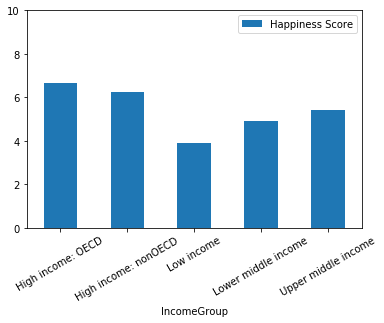

In [30]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))

#### Small fixes for the plot

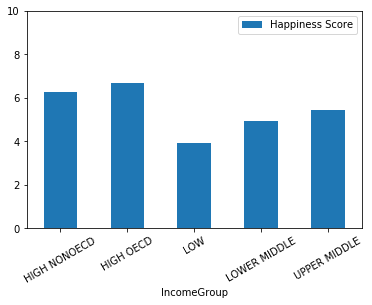

In [31]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()